# سوال ۶

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm 
import numpy as np

# 6-1

In [2]:
cancer = load_breast_cancer()

# 6-2

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)
from sklearn.svm import SVC
SV = SVC(kernel='linear',probability=True)
SV.fit(X_train, y_train)
y_pred = SV.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

# 6-3 

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

# 6-4

In [5]:
c=pd.DataFrame(confusion_matrix(y_test,y_pred) , index=['RealCancer','RealHealthy'],columns=['PredictionCancer','PredictionHealthy'])
c

,PredictionCancer,PredictionHealthy
RealCancer,46,1
RealHealthy,4,63


# 6-5

In [6]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# 6-6

In [7]:
from sklearn import preprocessing
normalize=preprocessing.normalize(c, norm='l1', axis=1)
normalize

array([[0.9787234 , 0.0212766 ],
       [0.05970149, 0.94029851]])

# 6-7

In [8]:
d=pd.DataFrame(normalize, index=['Malignant','Benign'],columns=['PredictionMalignant','PredictionBenign'])
d

,PredictionMalignant,PredictionBenign
Malignant,0.978723,0.021277
Benign,0.059701,0.940299


# 6-9

In [9]:
y_predict_proba=SV.predict_proba(X_test)
y_predict_proba

array([[9.39818924e-01, 6.01810755e-02],
       [1.04115441e-01, 8.95884559e-01],
       [1.34647464e-02, 9.86535254e-01],
       [1.80251624e-01, 8.19748376e-01],
       [4.99001988e-06, 9.99995010e-01],
       [1.72704894e-02, 9.82729511e-01],
       [3.20526775e-02, 9.67947322e-01],
       [1.07361228e-02, 9.89263877e-01],
       [1.69580798e-02, 9.83041920e-01],
       [3.45692157e-06, 9.99996543e-01],
       [3.61184481e-01, 6.38815519e-01],
       [2.47670940e-01, 7.52329060e-01],
       [9.81960626e-03, 9.90180394e-01],
       [4.48244610e-01, 5.51755390e-01],
       [2.80535200e-01, 7.19464800e-01],
       [8.99344512e-01, 1.00655488e-01],
       [2.32695205e-02, 9.76730479e-01],
       [9.99908093e-01, 9.19073762e-05],
       [9.38009389e-01, 6.19906113e-02],
       [9.99999160e-01, 8.39576402e-07],
       [9.95841246e-01, 4.15875447e-03],
       [7.86702485e-01, 2.13297515e-01],
       [1.72493478e-02, 9.82750652e-01],
       [3.77681604e-02, 9.62231840e-01],
       [7.286056

# 6-10

In [10]:
from sklearn.metrics import roc_curve ,auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds=roc_curve(y_test,y_pred)
print('fpr=',fpr,'\n','tpr=',tpr,'\n','thresholds=', thresholds)
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)

fpr= [0.        0.0212766 1.       ] 
 tpr= [0.         0.94029851 1.        ] 
 thresholds= [2 1 0]
ROC AUC: 0.96


# 6-11

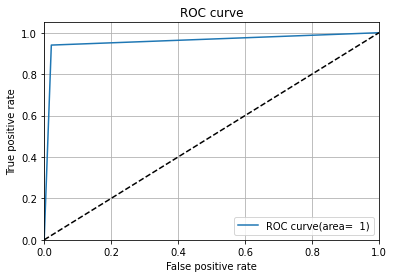

In [11]:
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()